# Лабораторная работа № 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_excel('2014.xlsx', sheet_name='2013 NYC Benchmark Data')

In [26]:
data.head()

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions,Direct GHG Emissions,Indirect GHG Emissions,Reported Property Floor Area,DOF Property Floor Area,Primary Property Type - Self Selected,DOF Number of Buildings
0,16099,4.084010e+09,NaN,4084010096,4453435,NaN,NaN,Queens,NaN,Not on Covered Buildings List,...,NaN,None,Not Available,966.7,806.6,160.1,91968,NaN,Multifamily Housing,NaN
1,500,1.005050e+09,NaN,1005050001,1007817,150,VARICK STREET,Manhattan,10013.0,Filed,...,Yes,ABS,44,1392.3,337.9,1054.4,235370,214110.0,Distribution Center,1.0
2,5017,1.021420e+09,NaN,1021420100,1063495,4079,BROADWAY,Manhattan,10032.0,Filed,...,No,None,Not Available,673.6,541.8,131.8,64806,64816.0,Multifamily Housing,1.0
3,5116,1.021750e+09,NaN,1021750080,1064235,60,SHERMAN AVENUE,Manhattan,10040.0,Filed,...,No,None,Not Available,485,403,82,62839,62847.0,Multifamily Housing,1.0
4,363,1.003360e+09,NaN,1003360005,1088884,16,BIALYSTOKER PLACE,Manhattan,10002.0,Filed,...,No,None,Not Available,435.5,290,145.5,98000,98052.0,Multifamily Housing,1.0


In [27]:
a = data.columns
for elem in a:
    print(elem)

Record Number
NYC Borough, Block, and Lot (BBL)
Co-reported BBL Status
BBLs Co-reported
Reported NYC Building Identificaiton Numbers (BINs)
Street Number
Street Name
Borough
Zip Code
DOF Benchmarking Submission Status
Site EUI
Weather Normalized Site EUI
Source EUI
Weather Normalized Source EUI
Municipally Supplied Potable Water
Automatic Water Benchmarking Eligible
Reported Water Method
ENERGY STAR Score
Total GHG Emissions
Direct GHG Emissions
Indirect GHG Emissions
Reported Property Floor Area
DOF Property Floor Area
Primary Property Type - Self Selected
DOF Number of Buildings


In [28]:
df = data[['Borough','Site EUI','Source EUI', 'Municipally Supplied Potable Water',
           'Total GHG Emissions','Weather Normalized Site EUI','DOF Property Floor Area','ENERGY STAR Score']]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16170 entries, 0 to 16169
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Borough                             16170 non-null  object 
 1   Site EUI                            12204 non-null  object 
 2   Source EUI                          12204 non-null  object 
 3   Municipally Supplied Potable Water  13790 non-null  object 
 4   Total GHG Emissions                 12380 non-null  object 
 5   Weather Normalized Site EUI         13790 non-null  object 
 6   DOF Property Floor Area             14465 non-null  float64
 7   ENERGY STAR Score                   13790 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1010.8+ KB


In [31]:
df['Site EUI'] = pd.to_numeric(df['Site EUI'], errors='coerce')
df['Source EUI'] = pd.to_numeric(df['Source EUI'], errors='coerce')
df['Municipally Supplied Potable Water'] = pd.to_numeric(df['Municipally Supplied Potable Water'], errors='coerce')
df['Total GHG Emissions'] = pd.to_numeric(df['Total GHG Emissions'], errors='coerce')
df['Weather Normalized Site EUI'] = pd.to_numeric(df['Weather Normalized Site EUI'], errors='coerce')
df['DOF Property Floor Area'] = pd.to_numeric(df['DOF Property Floor Area'], errors='coerce')
df['ENERGY STAR Score']  = pd.to_numeric(df['ENERGY STAR Score'], errors='coerce')

<ipython-input-31-ca93f2791cd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Site EUI'] = pd.to_numeric(df['Site EUI'], errors='coerce')
<ipython-input-31-ca93f2791cd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Source EUI'] = pd.to_numeric(df['Source EUI'], errors='coerce')
<ipython-input-31-ca93f2791cd0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [33]:
df = df.dropna(subset=['ENERGY STAR Score'])

In [46]:
df.isna().sum()

Borough                        0
Site EUI                       0
Source EUI                     0
Total GHG Emissions            0
Weather Normalized Site EUI    0
DOF Property Floor Area        0
ENERGY STAR Score              0
dtype: int64

In [44]:
df['Weather Normalized Site EUI'].fillna(df['Weather Normalized Site EUI'].mean(), inplace=True)
df['DOF Property Floor Area'].fillna(df['DOF Property Floor Area'].mean(), inplace = True)
df['Total GHG Emissions'].fillna(df['Total GHG Emissions'].mean(), inplace=True)

In [45]:
df = df.drop('Municipally Supplied Potable Water', axis=1)

In [48]:
ohc_borough = pd.get_dummies(df['Borough']) 

In [49]:
df = df.drop('Borough', axis=1)

In [50]:
df = pd.concat([df, ohc_borough], axis= 1)

# Обучение

In [52]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [53]:
labels = df['ENERGY STAR Score']
df =df.drop(['ENERGY STAR Score'], axis = 1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, 
                                                    test_size = 0.3,
                                                   random_state = 42)



In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(1422, 10)
(610, 10)
(1422,)
(610,)


Text(0.5, 1.0, 'Label split for test')

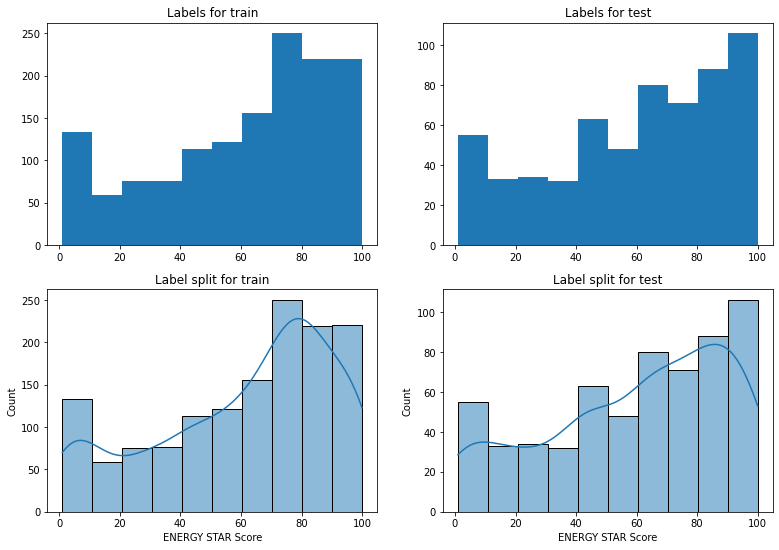

In [56]:
plt.figure(figsize=(13, 9))


plt.subplot(2,2,1)
plt.hist(y_train)
plt.title('Labels for train')

plt.subplot(2,2,2)
plt.hist(y_test)
plt.title('Labels for test')

plt.subplot(2,2,3)
sns.histplot(y_train, kde=True, bins = 10)
plt.title('Label split for train')

plt.subplot(2,2,4)
sns.histplot(y_test, kde=True, bins = 10)
plt.title('Label split for test')

In [57]:
# Model
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [58]:
prediction = regressor.predict(X_test)
metrics.mean_absolute_error(y_test, prediction)

22.22280907346349

In [59]:
print(y_test[:10])

1868     43.0
3845     77.0
1325     43.0
1453     44.0
13497    11.0
3074     92.0
1698     48.0
1039     65.0
5795     91.0
8052     84.0
Name: ENERGY STAR Score, dtype: float64


In [60]:
print(prediction[:10])

[75.92700707 66.16156581 57.61728141 58.96488438 44.5309515  68.84646197
 64.42614544 63.09096222 57.79549203 60.11475371]
